In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [68]:
songs = pd.read_csv('data/df_audio_features_1000.csv')
songs.set_index(['name','artist'], inplace = True)
# songs.drop(['instrumentalness','speechiness','mode','time_signature','duration_ms'], axis = 1,inplace=True)
# ,'mode','time_signature','duration_ms'

In [69]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1387 entries, ("Don't Be Cruel", 'Elvis Presley') to ('Ravel: Boléro, M. 81', 'Maurice Ravel')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1387 non-null   float64
 1   energy            1387 non-null   float64
 2   key               1387 non-null   int64  
 3   loudness          1387 non-null   float64
 4   mode              1387 non-null   int64  
 5   speechiness       1387 non-null   float64
 6   acousticness      1387 non-null   float64
 7   instrumentalness  1387 non-null   float64
 8   liveness          1387 non-null   float64
 9   valence           1387 non-null   float64
 10  tempo             1387 non-null   float64
 11  duration_ms       1387 non-null   int64  
 12  time_signature    1387 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 227.9+ KB


In [70]:
minmax = MinMaxScaler(feature_range=(0,1))
songs_scaled_minmax = minmax.fit_transform(songs)
songs_scaled_minmax = pd.DataFrame(songs_scaled_minmax, columns = songs.columns, index = songs.index)


In [71]:
from sklearn.cluster import KMeans

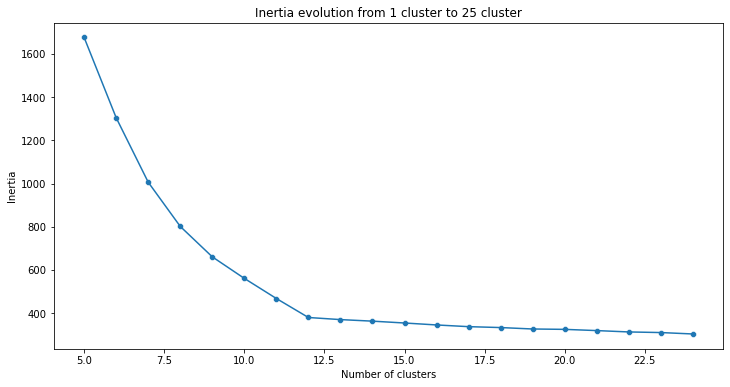

In [76]:
max_k = 25
min_k = 5
inertia = []

for k in range(min_k, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_scaled_minmax).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(min_k, max_k), y=inertia)
sns.scatterplot(x=range(min_k, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

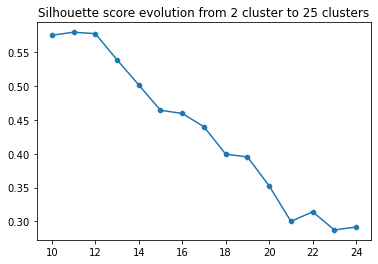

In [78]:
from sklearn.metrics import silhouette_score
max_k = 25
min_k = 10
sil_score = []

for k in range(min_k, max_k): 
    labels = KMeans(n_clusters=k).fit(songs_scaled_minmax).labels_
    sil_score.append(silhouette_score(songs_scaled_minmax, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(min_k, max_k), y=sil_score)
sns.scatterplot(x=range(min_k, max_k), y=sil_score)
plt.show()

In [79]:
songs_kmeans = KMeans(n_clusters=22)
songs_kmeans.fit(songs_scaled_minmax)
songs_scaled_minmax['cluster'] = songs_kmeans.labels_

In [81]:
test_sample = songs_scaled_minmax.groupby('cluster').sample(2)
test_sample

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
"Pines Of Rome, P. 141: 3. The Pines Of The Janiculum",Ottorino Respighi,0.065679,0.033916,0.363636,0.295465,1.0,0.034732,0.941767,0.867005,0.062118,0.016366,0.292822,0.090258,0.75,0
"Attila: ""Mentre gonfiarsi l'anima""",Giuseppe Verdi,0.154135,0.214843,0.454545,0.579323,1.0,0.041968,0.994980,0.550254,0.095717,0.073648,0.749598,0.033353,0.75,0
Break Ya Neck,Busta Rhymes,0.847413,0.793168,0.363636,0.810072,0.0,0.395803,0.464858,0.002548,0.042207,0.745183,0.212771,0.045006,0.75,1
Se iluminaba,Fred De Palma,0.808713,0.695777,0.000000,0.866677,0.0,0.073625,0.081424,0.000000,0.051955,0.626062,0.473963,0.029718,0.75,1
You Can't Bring Me Down,Suicidal Tendencies,0.234852,0.961847,0.000000,0.738805,1.0,0.647250,0.001956,0.000047,0.073421,0.019267,0.556607,0.076028,0.75,2
Looking Down the Barrel of Today,Hatebreed,0.472579,0.990964,0.090909,0.872612,1.0,0.104920,0.000651,0.051371,0.273048,0.496582,0.832414,0.026344,0.75,2
I Can See Clearly Now,Johnny Nash,0.689297,0.532119,0.181818,0.788376,1.0,0.066751,0.411645,0.000075,0.040755,0.579449,0.476958,0.026617,0.75,3
Papa Loves Mambo,Perry Como,0.679345,0.499990,0.000000,0.754787,1.0,0.193198,0.514055,0.000002,0.397490,0.753470,0.200391,0.026472,0.75,3
Only You (And You Alone),The Platters,0.388545,0.281110,0.272727,0.713218,1.0,0.009588,0.959839,0.000000,0.102976,0.299772,0.195679,0.024763,0.75,4


In [82]:
quantiletrans = QuantileTransformer()

songs_scaled_quantiletrans = quantiletrans.fit_transform(songs)

songs_scaled_quantiletrans = pd.DataFrame(songs_scaled_quantiletrans, columns = songs.columns, index = songs.index)

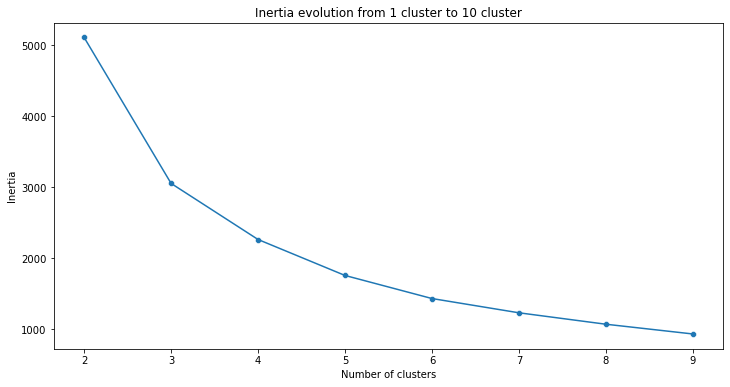

In [93]:
max_k = 10
min_k = 2
inertia = []

for k in range(min_k, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_scaled_quantiletrans).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(min_k, max_k), y=inertia)
sns.scatterplot(x=range(min_k, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

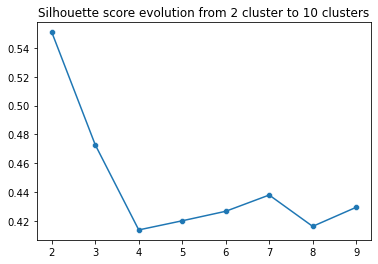

In [92]:
from sklearn.metrics import silhouette_score
max_k = 10
min_k = 2
sil_score = []

for k in range(min_k, max_k): 
    labels = KMeans(n_clusters=k).fit(songs_scaled_quantiletrans).labels_
    sil_score.append(silhouette_score(songs_scaled_quantiletrans, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(min_k, max_k), y=sil_score)
sns.scatterplot(x=range(min_k, max_k), y=sil_score)
plt.show()

In [107]:
songs_kmeans = KMeans(n_clusters=1000)
songs_kmeans.fit(songs_scaled_quantiletrans)
songs_scaled_quantiletrans['cluster'] = songs_kmeans.labels_

In [108]:
silhouette_score(songs_scaled_quantiletrans, songs_kmeans.labels_)

0.3510747210249368

In [122]:
# list_of_silouetthes = {'number':[],'score':[]}
# for i in range(2,100):
    
#     songs_kmeans = KMeans(n_clusters=i).fit(songs_scaled_quantiletrans)
#     list_of_silouetthes['score'].append(silhouette_score(songs_scaled_quantiletrans, songs_kmeans.labels_))
#     list_of_silouetthes['number'].append(i)


    
# sil = pd.DataFrame.from_dict(list_of_silouetthes)

In [127]:
# sil.sort_values('score', ascending=False).head(20)

In [96]:
test_sample = songs_scaled_quantiletrans.groupby('cluster').sample(3)
test_sample

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
"Nabucco / Act 3: Va, pensiero, sull'ali dorate",Giuseppe Verdi,0.007327,0.023042,0.173674,0.059088,1.0,0.291291,0.959459,0.826841,0.335335,0.173084,0.059096,0.514310,0.544044,0
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",Edward Elgar,0.051985,0.247247,0.638639,0.157300,1.0,0.291291,0.775194,0.925826,0.310078,0.175175,0.130255,0.773582,0.544044,0
"Roméo et Juliette, CG 9 / Act 1: ""Ah, je veux vivre dans ce rève""",Charles Gounod,0.216216,0.263263,0.000000,0.342766,1.0,0.752525,0.953954,0.639640,0.209302,0.230230,0.093411,0.503059,0.544044,0
"Le nozze di Figaro, K. 492 / Act 3: ""Sull’aria ... Che soave zeffiretto""",Wolfgang Amadeus Mozart,0.138138,0.048722,0.896396,0.052048,1.0,0.546046,0.966466,0.408388,0.933622,0.152152,0.420694,0.376494,0.060561,1
Won't Be Moved,Gene Moore,0.830330,0.568569,0.812813,0.502552,1.0,0.797798,0.234054,0.447560,0.194194,0.607608,0.274759,0.189987,0.544044,1
Juicy - 2005 Remaster,The Notorious B.I.G.,0.968254,0.854855,0.812813,0.849259,1.0,0.920921,0.539540,0.000000,0.710210,0.805806,0.329051,0.747637,0.544044,1
Stronger,Kanye West,0.240254,0.808809,0.173674,0.679680,1.0,0.882382,0.068643,0.000000,0.752252,0.461962,0.430533,0.763654,0.544044,2
ME! (feat. Brendon Urie of Panic! At The Disco),Taylor Swift,0.569570,0.865744,0.000000,0.899814,1.0,0.586587,0.174174,0.000000,0.497497,0.745310,0.977814,0.259169,0.544044,2
Deja vu,Prince Royce,0.772017,0.831907,0.812813,0.922136,1.0,0.110110,0.494995,0.000000,0.859307,0.855856,0.629116,0.277908,0.544044,2
